# **SVM**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Mhmd-sh3rawy/Spotify_dataset_NTI/refs/heads/main/data/procesed/modified-spotify-data.csv')

In [ ]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (89740, 157)


In [ ]:
print(f"Columns: {list(df.columns)}")

Columns: ['Unnamed: 0', 'track_genre_acoustic', 'track_genre_afrobeat', 'track_genre_alt-rock', 'track_genre_alternative', 'track_genre_ambient', 'track_genre_anime', 'track_genre_black-metal', 'track_genre_bluegrass', 'track_genre_blues', 'track_genre_brazil', 'track_genre_breakbeat', 'track_genre_british', 'track_genre_cantopop', 'track_genre_chicago-house', 'track_genre_children', 'track_genre_chill', 'track_genre_classical', 'track_genre_club', 'track_genre_comedy', 'track_genre_country', 'track_genre_dance', 'track_genre_dancehall', 'track_genre_death-metal', 'track_genre_deep-house', 'track_genre_detroit-techno', 'track_genre_disco', 'track_genre_disney', 'track_genre_drum-and-bass', 'track_genre_dub', 'track_genre_dubstep', 'track_genre_edm', 'track_genre_electro', 'track_genre_electronic', 'track_genre_emo', 'track_genre_folk', 'track_genre_forro', 'track_genre_french', 'track_genre_funk', 'track_genre_garage', 'track_genre_german', 'track_genre_gospel', 'track_genre_goth', 'tr

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Columns: 157 entries, Unnamed: 0 to temp_zscore
dtypes: float64(156), int64(1)
memory usage: 107.5 MB
None


In [ ]:
print(df.head())

   Unnamed: 0  track_genre_acoustic  track_genre_afrobeat  \
0           0                   0.0                   0.0   
1           1                   0.0                   0.0   
2           2                   0.0                   0.0   
3           3                   0.0                   0.0   
4           4                   0.0                   0.0   

   track_genre_alt-rock  track_genre_alternative  track_genre_ambient  \
0                   0.0                      0.0                  0.0   
1                   0.0                      0.0                  0.0   
2                   0.0                      0.0                  0.0   
3                   0.0                      0.0                  0.0   
4                   0.0                      0.0                  0.0   

   track_genre_anime  track_genre_black-metal  track_genre_bluegrass  \
0                0.0                      0.0                    0.0   
1                0.0                      0.0     

In [ ]:
print(df.describe())

         Unnamed: 0  track_genre_acoustic  track_genre_afrobeat  \
count  89740.000000          89740.000000          89740.000000   
mean   44869.500000              0.009984              0.010831   
std    25905.850916              0.099422              0.103509   
min        0.000000              0.000000              0.000000   
25%    22434.750000              0.000000              0.000000   
50%    44869.500000              0.000000              0.000000   
75%    67304.250000              0.000000              0.000000   
max    89739.000000              1.000000              1.000000   

       track_genre_alt-rock  track_genre_alternative  track_genre_ambient  \
count          89740.000000             89740.000000         89740.000000   
mean               0.005527                 0.004702             0.009550   
std                0.074139                 0.068414             0.097256   
min                0.000000                 0.000000             0.000000   
25%        

In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Duplicate rows: 0


In [ ]:
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

In [ ]:
print("\nHandling missing values...")
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            # For categorical columns, fill with mode
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            # For numerical columns, fill with median
            df[column] = df[column].fillna(df[column].median())

print("Missing values after handling:")
print(df.isnull().sum().sum())


Handling missing values...
Missing values after handling:
0


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {list(categorical_columns)}")


Categorical columns: []


In [ ]:
# Drop the 'Unnamed: 0' column as it appears to be an index column
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("Dropped 'Unnamed: 0' column")

Dropped 'Unnamed: 0' column


In [ ]:
label_encoders = {}
for column in categorical_columns:
    if column != 'target':  # Assuming 'target' is our target variable
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

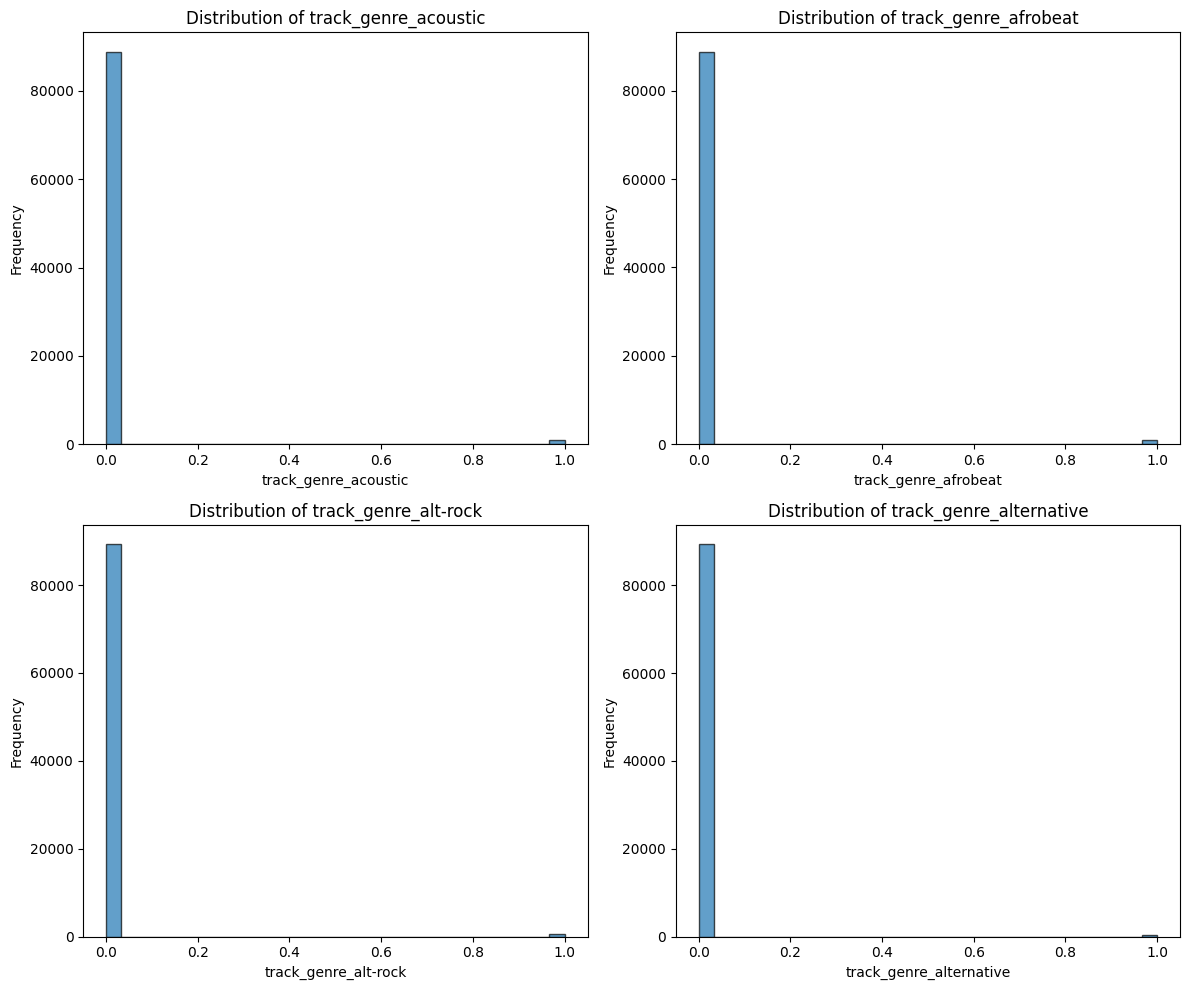

In [ ]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) # Create a 2x2 grid for the first 4 plots

for i, col in enumerate(numerical_columns[:4]):
    row = i // 2
    col_idx = i % 2
    axes[row, col_idx].hist(df[col], bins=30, alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('data_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

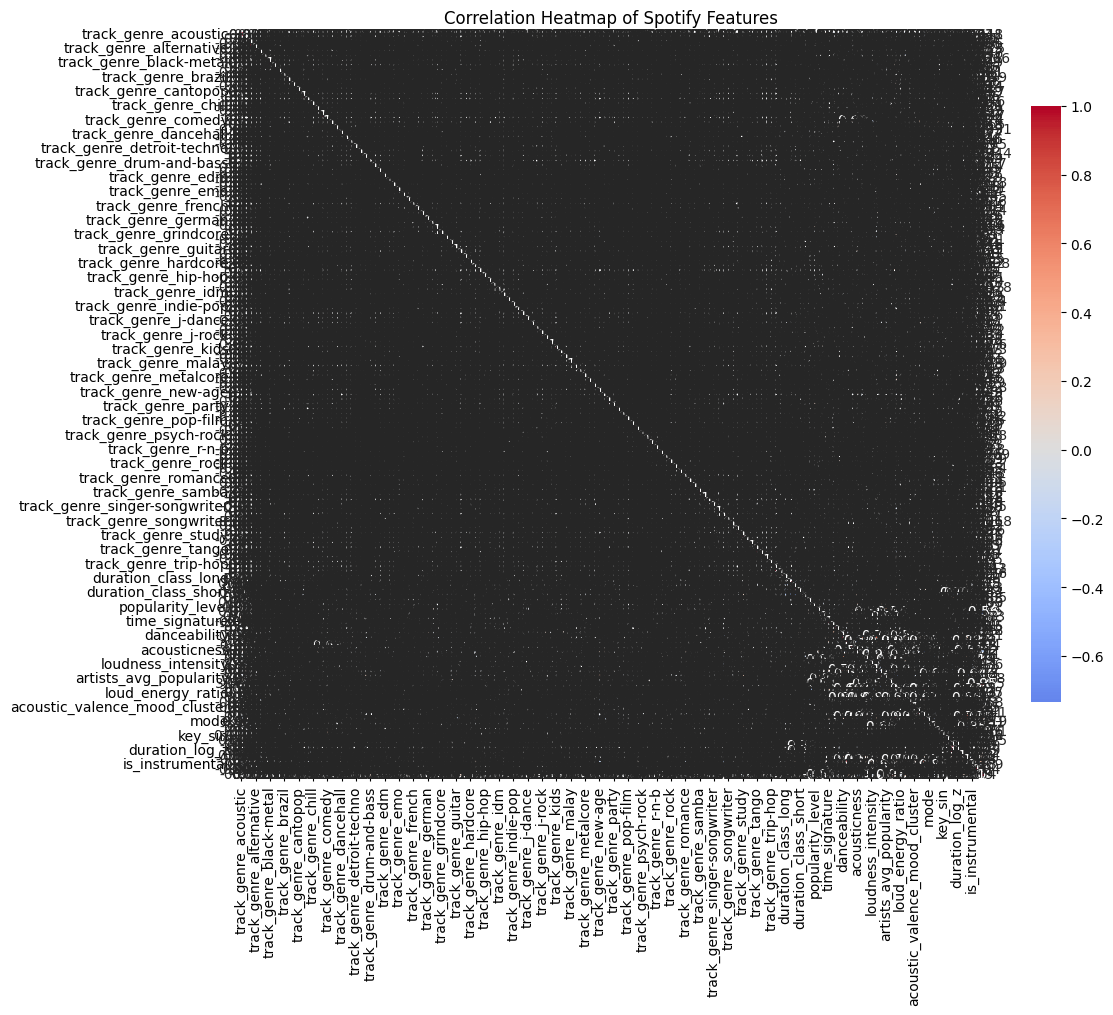

In [ ]:
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Spotify Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
print(df.columns)

Index(['track_genre_acoustic', 'track_genre_afrobeat', 'track_genre_alt-rock',
       'track_genre_alternative', 'track_genre_ambient', 'track_genre_anime',
       'track_genre_black-metal', 'track_genre_bluegrass', 'track_genre_blues',
       'track_genre_brazil',
       ...
       'liveness', 'key_sin', 'key_cos', 'duration_log', 'duration_log_z',
       'time_signature_class_boolean', 'loudness_yeo', 'is_instrumental',
       'is_dance_hit', 'temp_zscore'],
      dtype='object', length=156)


In [ ]:
if 'target' in df.columns:
    target_column = 'target'
elif 'popularity' in df.columns:
    target_column = 'popularity'
else:
    # Use the last column as target
    target_column = df.columns[-1]

print(f"Target variable: {target_column}")

Target variable: popularity


In [ ]:
df = df.drop(columns=['popularity_level'])

In [ ]:
# Define 5 popularity classes using quantiles
df['popularity_class'] = pd.qcut(df['popularity'], q=5, labels=False, duplicates='drop')

# Assign the new categorical column to y
y = df['popularity_class']

# Print the value counts of the different classes in y
print("\nPopularity class distribution:")
print(y.value_counts().sort_index())


Popularity class distribution:
popularity_class
0    18892
1    17485
2    18734
3    17057
4    17572
Name: count, dtype: int64


In [ ]:
X = df.drop(columns=['popularity_class'])
y = df['popularity_class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts(normalize=True).sort_index()}")
print(f"Test target distribution:\n{y_test.value_counts(normalize=True).sort_index()}")

Training set shape: (71792, 155)
Test set shape: (17948, 155)
Training target distribution:
popularity_class
0    0.210525
1    0.194841
2    0.208756
3    0.190063
4    0.195816
Name: proportion, dtype: float64
Test target distribution:
popularity_class
0    0.210497
1    0.194841
2    0.208770
3    0.190105
4    0.195788
Name: proportion, dtype: float64


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Use the 5 popularity classes for classification
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
# Use the 5 popularity classes for prediction
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
# Calculate training accuracy using 5 popularity classes
y_pred_train_svm = svm_model.predict(X_train_scaled)
svm_train_accuracy = accuracy_score(y_train, y_pred_train_svm)
print(f"SVM Training Accuracy: {svm_train_accuracy:.4f}")

# Calculate test accuracy using 5 popularity classes
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {svm_accuracy:.4f}")

SVM Training Accuracy: 0.9138
SVM Test Accuracy: 0.8954


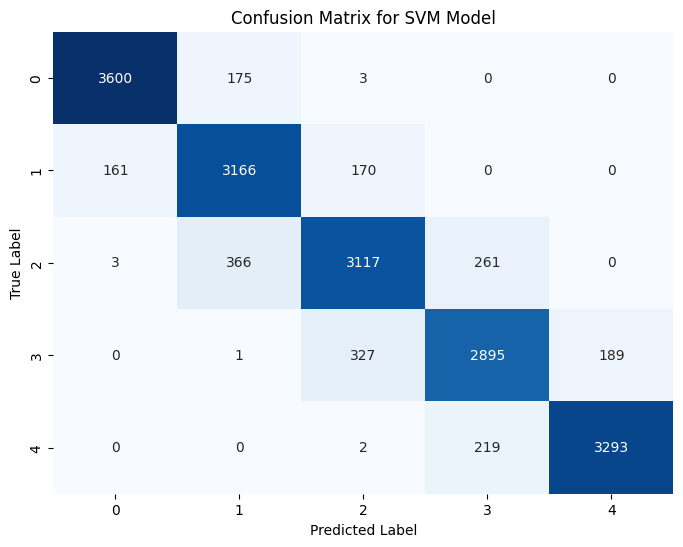

In [ ]:
# Calculate and display the confusion matrix using 5 popularity classes
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

In [ ]:
# Print classification report using 5 popularity classes
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3778
           1       0.85      0.91      0.88      3497
           2       0.86      0.83      0.85      3747
           3       0.86      0.85      0.85      3412
           4       0.95      0.94      0.94      3514

    accuracy                           0.90     17948
   macro avg       0.90      0.90      0.89     17948
weighted avg       0.90      0.90      0.90     17948



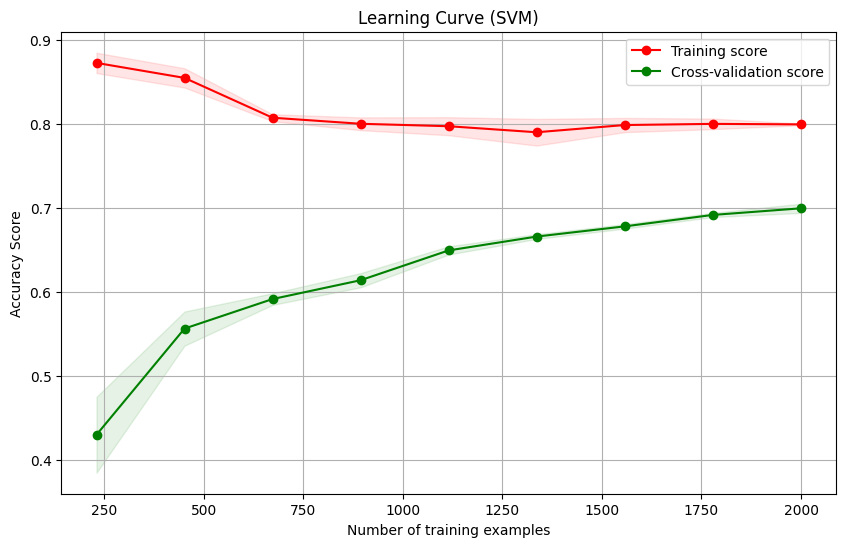

In [ ]:
from sklearn.model_selection import learning_curve

# Define the training sizes to stop at 2000 samples
# Ensure train_sizes are positive integers
train_sizes = np.linspace(10, 2000, 10).astype(int) # Start from 10 to ensure positive values

# Calculate the learning curve using 5 popularity classes
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=train_sizes, scoring='accuracy')

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve (SVM)")
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()

# **Deep Learning**

---



Epoch 1/100
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6566 - loss: 0.8549 - val_accuracy: 0.9178 - val_loss: 0.2139
Epoch 2/100
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9341 - loss: 0.1739 - val_accuracy: 0.9564 - val_loss: 0.1146
Epoch 3/100
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9628 - loss: 0.1002 - val_accuracy: 0.9617 - val_loss: 0.0910
Epoch 4/100
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9712 - loss: 0.0762 - val_accuracy: 0.9679 - val_loss: 0.0793
Epoch 5/100
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9753 - loss: 0.0652 - val_accuracy: 0.9705 - val_loss: 0.0720
Epoch 6/100
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9774 - loss: 0.0568 - val_accuracy: 0.9731 - val_loss: 0.0659
Epoch 7/100
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9796 - loss: 0.0514 - val_accuracy: 0.9706 - val_loss: 0.0656
Epoch 8/100
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9819 - lo

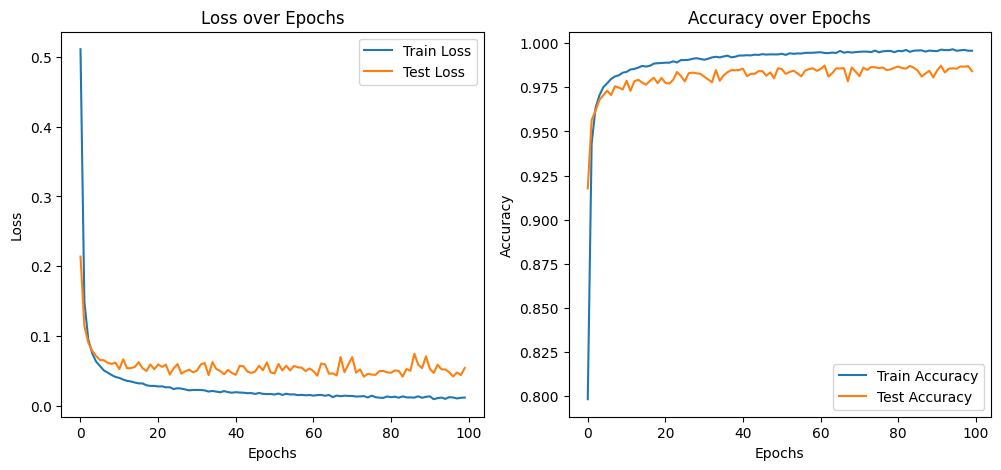

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error # Import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import SGD # Removed SGD import
from tensorflow.keras.optimizers import Adam # Imported Adam optimizer
import tensorflow as tf # Import tensorflow for tf.sqrt

# Use the existing DataFrame 'df' which has been loaded and preprocessed
# Assuming 'popularity_class' is the target column as identified previously
target_column = 'popularity_class'

X = df.drop(columns=[target_column])
y = df[target_column]

# Convert target to binary classification if it's continuous, as done for other models
# No need to convert to binary anymore, we'll use the 5 classes
# if y.dtype in ['float64', 'int64'] and y.nunique() > 10:
#     y = (y > y.median()).astype(int)
#     print(f"Converted continuous target to binary classification for Deep Learning model")
#     print(f"Class distribution: {y.value_counts()}")


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Added stratify based on previous splits


# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Use softmax for multi-class classification with 5 classes

# Compile with Adam optimizer and categorical crossentropy loss for multi-class classification
model.compile(optimizer=Adam(learning_rate=0.0005), # Use Adam with reduced learning rate
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for multi-class
              metrics=['accuracy']) # Use accuracy metric


# Train
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=100,
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nDeep Learning Model Test Loss: {loss:.4f}")
print(f"Deep Learning Model Test Accuracy: {accuracy:.4f}")


# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy') # Changed metric name
plt.plot(history.history['val_accuracy'], label='Test Accuracy') # Changed metric name
plt.title('Accuracy over Epochs') # Changed title
plt.xlabel('Epochs')
plt.ylabel('Accuracy') # Changed ylabel
plt.legend()
plt.show()

# **KNN**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = df.drop(columns=['popularity_class'])
y = df['popularity_class']

In [ ]:
# Convert target to binary classification if it's continuous
# No need to convert to binary anymore, we'll use the 5 classes
# if y.dtype in ['float64', 'int64'] and y.nunique() > 10:
#     # Convert to binary classification (above/below median)
#     y_binary = (y > y.median()).astype(int)
#     print(f"Converted continuous target to binary classification")
#     print(f"Class distribution: {y_binary.value_counts()}")
#     y = y_binary

Converted continuous target to binary classification
Class distribution: popularity
0    45148
1    44592
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

In [ ]:
# Calculate training accuracy
y_pred_train_knn = knn_model.predict(X_train_scaled)
knn_train_accuracy = accuracy_score(y_train, y_pred_train_knn)
print(f"KNN Training Accuracy: {knn_train_accuracy:.4f}")


knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Test Accuracy: {knn_accuracy:.4f}")

# KNN is a classification model, so MSE, MAE, RMSE, and R² are not appropriate metrics.
# knn_mse = mean_squared_error(y_test, y_pred_knn)
# knn_mae = mean_absolute_error(y_test, y_pred_knn)
# knn_rmse = np.sqrt(knn_mse)
# knn_r2 = r2_score(y_test, y_pred_knn)

# print(f"KNN MSE: {knn_mse:.4f}")
# print(f"KNN MAE: {knn_mae:.4f}")
# print(f"KNN RMSE: {knn_rmse:.4f}")
# print(f"KNN R² Score: {knn_r2:.4f}")

KNN Training Accuracy: 0.9277
KNN Test Accuracy: 0.8970
KNN MSE: 0.1030
KNN MAE: 0.1030
KNN RMSE: 0.3210
KNN R² Score: 0.5879


In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      9030
           1       0.90      0.90      0.90      8918

    accuracy                           0.90     17948
   macro avg       0.90      0.90      0.90     17948
weighted avg       0.90      0.90      0.90     17948



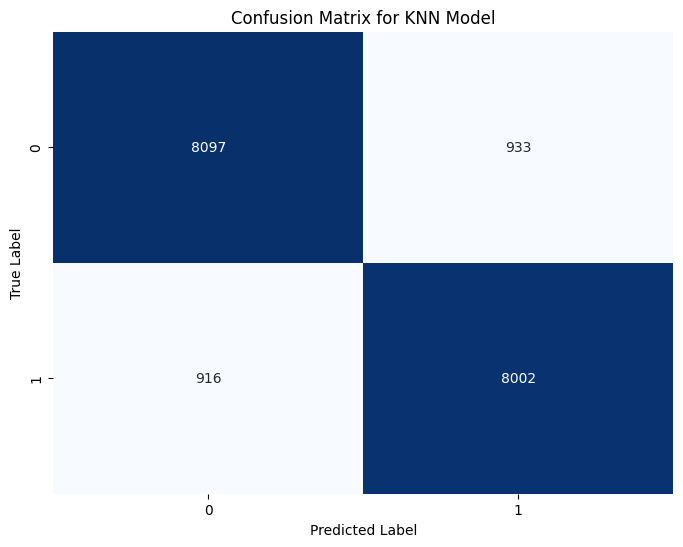

In [ ]:
# Calculate and display the confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN Model')
plt.show()

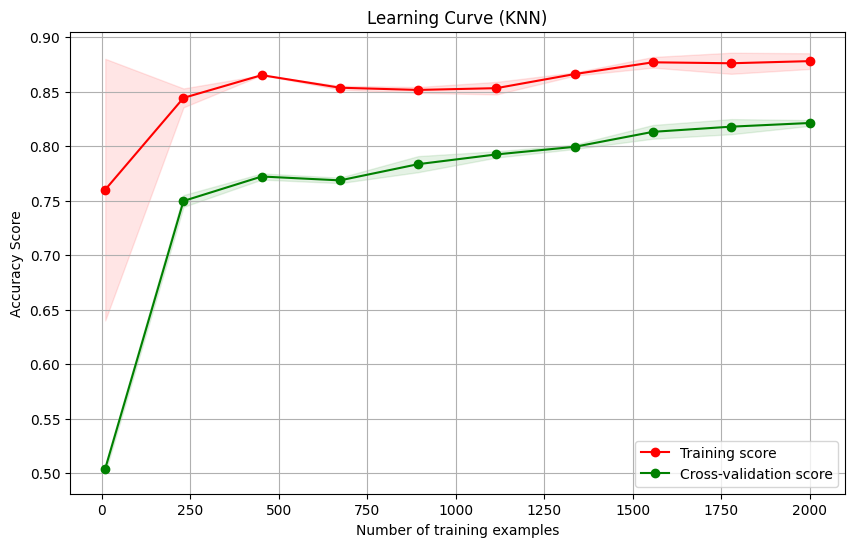

In [ ]:
from sklearn.model_selection import learning_curve

# Define the training sizes to stop at 2000 samples
# Ensure train_sizes are positive integers
train_sizes_knn = np.linspace(10, 2000, 10).astype(int) # Start from 10 to ensure positive values

# Calculate the learning curve for KNN
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(
    knn_model, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=train_sizes_knn, scoring='accuracy')

# Calculate mean and standard deviation for training and test scores
train_scores_mean_knn = np.mean(train_scores_knn, axis=1)
train_scores_std_knn = np.std(train_scores_knn, axis=1)
test_scores_mean_knn = np.mean(test_scores_knn, axis=1)
test_scores_std_knn = np.std(test_scores_knn, axis=1)

# Plot the learning curve for KNN
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_knn, train_scores_mean_knn - train_scores_std_knn,
                 train_scores_mean_knn + train_scores_std_knn, alpha=0.1, color="r")
plt.fill_between(train_sizes_knn, test_scores_mean_knn - test_scores_std_knn,
                 test_scores_mean_knn + test_scores_std_knn, alpha=0.1, color="g")
plt.plot(train_sizes_knn, train_scores_mean_knn, 'o-', color="r", label="Training score")
plt.plot(train_sizes_knn, test_scores_mean_knn, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve (KNN)")
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()